In [1]:
import pandas as pd
import nltk
# nltk.download('punkt')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
movies = pd.read_csv("../ml-latest-small/movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings = pd.read_csv("../ml-latest-small/ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
# use or don't use
tags = pd.read_csv("../ml-latest-small/tags.csv")
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [5]:
# Make each user id a unique row 
df = pd.merge(ratings, movies, on="movieId")
df.sort_values("userId").head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12117,1,2389,2.0,964983094,Psycho (1998),Crime|Horror|Thriller
12126,1,2395,5.0,964981093,Rushmore (1998),Comedy|Drama
12182,1,2406,4.0,964982310,Romancing the Stone (1984),Action|Adventure|Comedy|Romance
776,1,70,3.0,964982400,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller


In [6]:
df['genres'] = df['genres'].str.split("|")
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,5,1,4.0,847434962,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
2,7,1,4.5,1106635946,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
3,15,1,2.5,1510577970,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
4,17,1,4.5,1305696483,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"


In [20]:
df['year'] = df['title'].str.extract('.*\((.*)\).*')
df.head()

,userId,movieId,rating,timestamp,title,genres,year
0,1,1,4,964982703,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,5,1,4,847434962,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995
2,7,1,4,1106635946,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995
3,15,1,2,1510577970,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995
4,17,1,4,1305696483,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995


In [17]:
# convert the tags or the genres to numerical using hashing?

In [31]:
df = df.replace(to_replace = '2006–2007', value = '2007')
df = df.fillna(0)

In [32]:
df['rating'] = df['rating'].astype(int) 
target = df["rating"]


In [33]:
df['userId'] = df['userId'].astype(int) 
df['movieId'] = df['movieId'].astype(int) 
df['year'] = df['year'].astype(int) 

In [35]:
data = df[["userId", "movieId", "year"]]
feature_names = data.columns
data.head()

,userId,movieId,year
0,1,1,1995
1,5,1,1995
2,7,1,1995
3,15,1,1995
4,17,1,1995


In [36]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [37]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.35491292792256735

In [38]:
importances = rf.feature_importances_
importances

array([0.48369438, 0.45412877, 0.06217685])

In [39]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.4836943805992914, 'userId'),
 (0.4541287677482668, 'movieId'),
 (0.06217685165244208, 'year')]

No handles with labels found to put in legend.


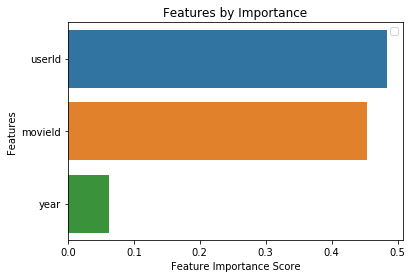

In [40]:
sns.barplot(x=importances, y=feature_names)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Features by Importance")
plt.legend()
plt.show()